In [1]:
# Usual data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_csv('mypertamina-review.csv', parse_dates=['at', 'repliedAt'])
sentiments = pd.read_csv('review-label.csv')

In [3]:
reviews.tail()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
122989,273b017d-1b0a-4b8a-961a-faa7629f40f2,Pengguna Google,Mantap...,5,1,NaN,2017-08-10 21:19:14,Terima kasih sobat Sukrons KRN atas apresiasin...,2018-09-14 13:13:14
122990,7c86bfc3-7d7f-425d-98d9-bde583f2f6d9,Pengguna Google,#bringbackRioHaryantoF12018 @pertaminaracingid,3,0,NaN,2017-08-10 09:50:30,Terima kasih atas masukannya sobat bukhari yul...,2018-09-17 04:29:16
122991,45e977af-e705-4d02-9ad4-4c3d357e0b1a,Pengguna Google,Downloader ke 100... Nice apps... smg ada prog...,5,1,1.0.2,2017-08-10 08:43:30,Terima kasih sobat Dudy Effendi atas attention...,2018-09-14 13:06:49
122992,592690d7-ecdb-4796-ae06-6764c70b3840,Pengguna Google,Good start.. be responsive toward feedback and...,5,0,1.0,2017-08-09 17:58:21,Hai sobat Ilmianto Boediman. Terima kasih atas...,2018-10-03 15:03:26
122993,9185aeed-b46a-42b7-87f4-4c4380f8b09a,Pengguna Google,Saya kasih bintang 3 dolo yee...soalnya blom c...,3,1,1.0,2017-08-09 13:18:30,Terima kasih sobat Indrie Lestari atas attenti...,2018-09-17 08:38:33


In [4]:
sentiments.tail()

,reviewId,raw,preprocessed,weight,label
104819,e330c66a-3d7c-4884-9b65-c38ce0b280cf,Nice mulai download aplikasi sampai pengisian ...,nice mulai download aplikasi sampai pengisian ...,-11,negative
104820,273b017d-1b0a-4b8a-961a-faa7629f40f2,Mantap...,mantap,5,positive
104821,45e977af-e705-4d02-9ad4-4c3d357e0b1a,Downloader ke 100... Nice apps... smg ada prog...,downloader ke nice apps smg ada program loyalt...,5,positive
104822,592690d7-ecdb-4796-ae06-6764c70b3840,Good start.. be responsive toward feedback and...,good start be responsive toward feedback and p...,5,positive
104823,9185aeed-b46a-42b7-87f4-4c4380f8b09a,Saya kasih bintang 3 dolo yee...soalnya blom c...,saya kasih bintang dolo yeesoalnya blom coba n...,-8,negative


In [5]:
reviews.dtypes

reviewId                        object
userName                        object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
dtype: object

In [6]:
sentiments.dtypes

reviewId        object
raw             object
preprocessed    object
weight           int64
label           object
dtype: object

# Star reviews over time

In [7]:
# There is no missing value
reviews['score'].isna().sum()

0

In [8]:
# See how ratings develop over time

reviews_over_time = reviews.sort_values('at')
stars = reviews_over_time['score']
stars.index = reviews_over_time['at'].values

# Calculate mean of stars, cumulatively, starting at first 10 reviews
stars_over_time = stars.expanding(10).mean()
stars_over_time

2017-08-09 13:18:30         NaN
2017-08-09 17:58:21         NaN
2017-08-10 08:43:30         NaN
2017-08-10 09:50:30         NaN
2017-08-10 21:19:14         NaN
                         ...   
2022-07-04 17:18:36    1.814269
2022-07-04 17:18:44    1.814263
2022-07-04 17:18:50    1.814256
2022-07-04 17:18:51    1.814250
2022-07-04 17:18:54    1.814243
Name: score, Length: 122994, dtype: float64

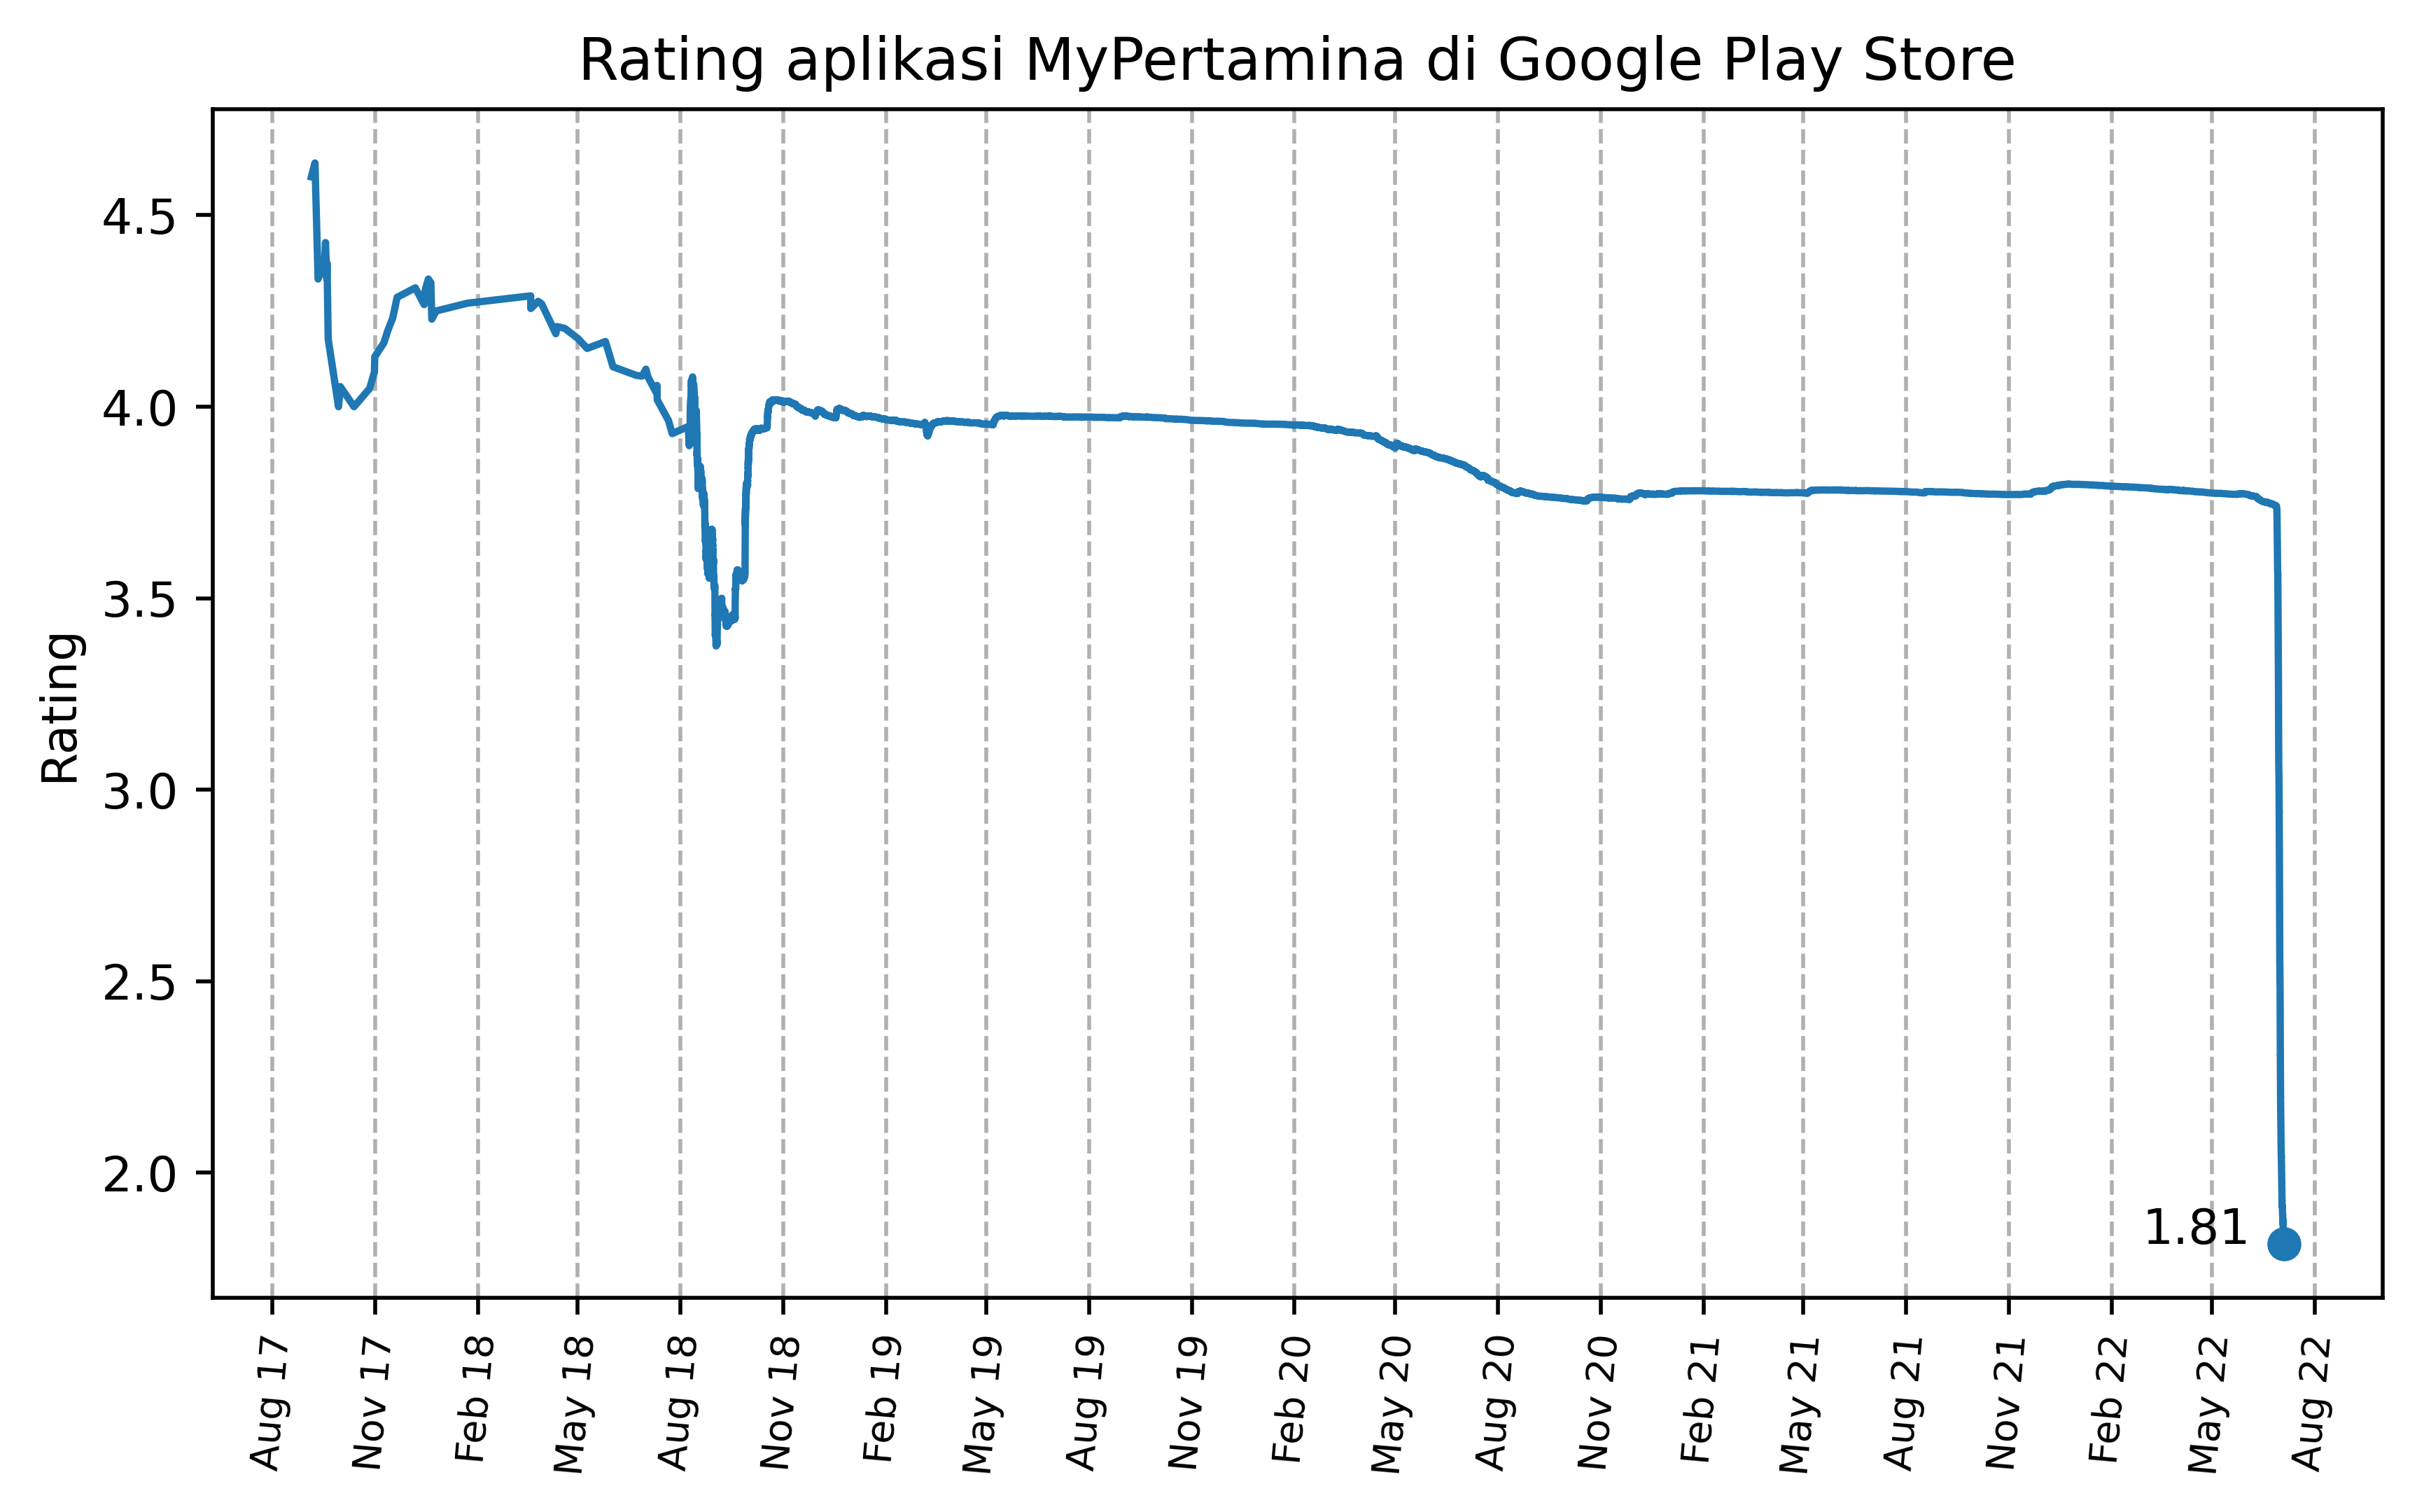

In [9]:
# Cumulative rating (as would be seen in Play Store itself) over time
from matplotlib import dates
from datetime import timedelta

plt.rcParams.update({'figure.figsize':(8,4.5),
                     'figure.dpi':500,
                     'savefig.facecolor': 'white'})

f, ax = plt.subplots()
ax.plot(stars_over_time)
ax.set_ylabel('Rating')
ax.set_xlabel('')

ax.xaxis.grid(visible=True, linestyle='dashed')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)

ax.set_title('Rating aplikasi MyPertamina di Google Play Store')

ax.text(stars_over_time.index[-1] - timedelta(days=30), stars_over_time[-1], stars_over_time[-1].round(2), ha='right')
ax.scatter(stars_over_time.index[-1], stars_over_time[-1])

plt.savefig('rating-over-time.png')
plt.show()

# Number of reviews over time

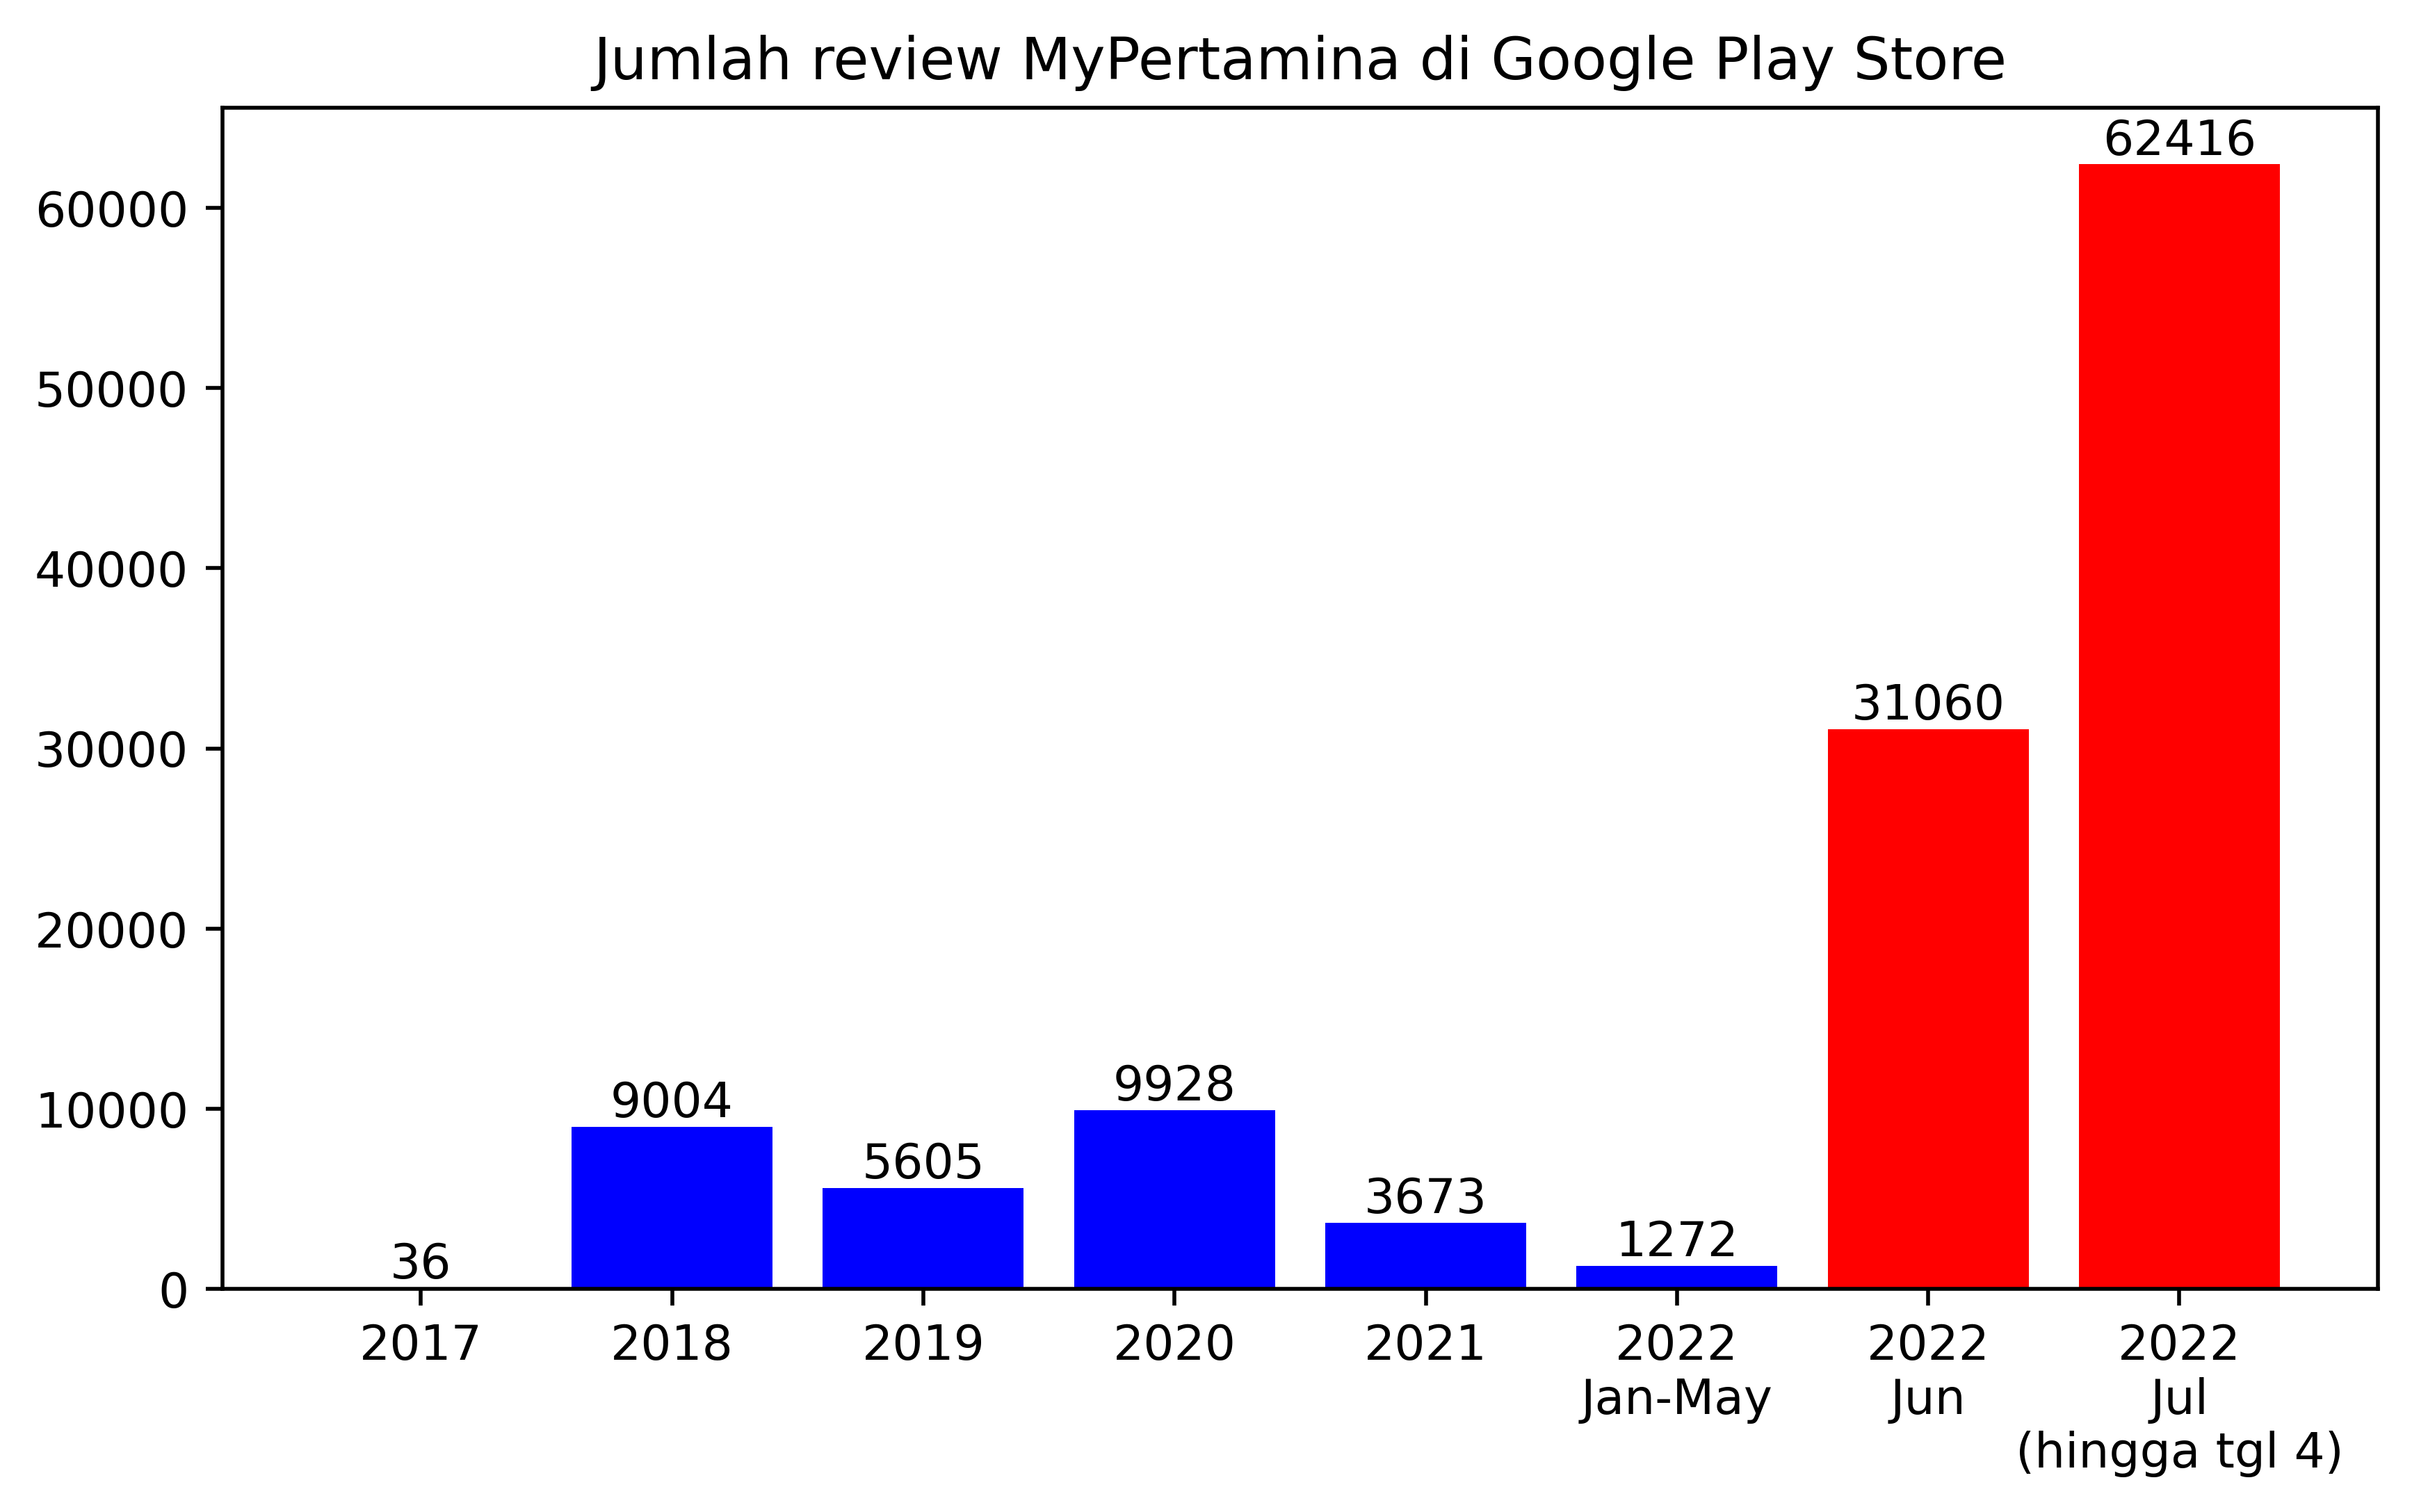

In [10]:
# Comparison of how many people reviewed over time

n_reviews = pd.DataFrame([
    ['2017', stars[stars.index.year == 2017].count()],
    ['2018', stars[stars.index.year == 2018].count()],
    ['2019', stars[stars.index.year == 2019].count()],
    ['2020', stars[stars.index.year == 2020].count()],
    ['2021', stars[stars.index.year == 2021].count()],
    ['2022\nJan-May', stars[(stars.index.year == 2022) & (stars.index < '2022-06')].count()],
    ['2022\nJun', stars[(stars.index >= '2022-06') & (stars.index < '2022-07')].count()],
    ['2022\nJul\n(hingga tgl 4)', stars[(stars.index >= '2022-07')].count()]
], columns =  ['time', 'n'])

f, ax = plt.subplots()

ax.bar(n_reviews['time'], n_reviews['n'], color=list('bbbbbbrr'))
ax.bar_label(ax.containers[0])

ax.set_title('Jumlah review MyPertamina di Google Play Store')

plt.savefig('review-count-over-time.png')
plt.show()

# Sentiments over time

In [11]:
sentiments_over_time = reviews_over_time[['reviewId', 'content', 'score', 'reviewCreatedVersion', 'at']]
sentiments_over_time = sentiments_over_time.merge(sentiments[['reviewId', 'preprocessed', 'label']],
                                                  on='reviewId')
polarity = sentiments_over_time['label'].copy()
polarity.index = sentiments_over_time['at']
polarity[polarity == 'positive'] = 1
polarity[polarity == 'negative'] = -1
polarity[polarity == 'neutral'] = 0

polarity_over_time = polarity.expanding(10).mean()
polarity_over_time

at
2017-08-09 13:18:30         NaN
2017-08-09 17:58:21         NaN
2017-08-10 08:43:30         NaN
2017-08-10 21:19:14         NaN
2017-08-10 23:07:54         NaN
                         ...   
2022-07-04 17:18:25   -0.732036
2022-07-04 17:18:36   -0.732038
2022-07-04 17:18:50   -0.732041
2022-07-04 17:18:51   -0.732044
2022-07-04 17:18:54   -0.732046
Name: label, Length: 104824, dtype: float64

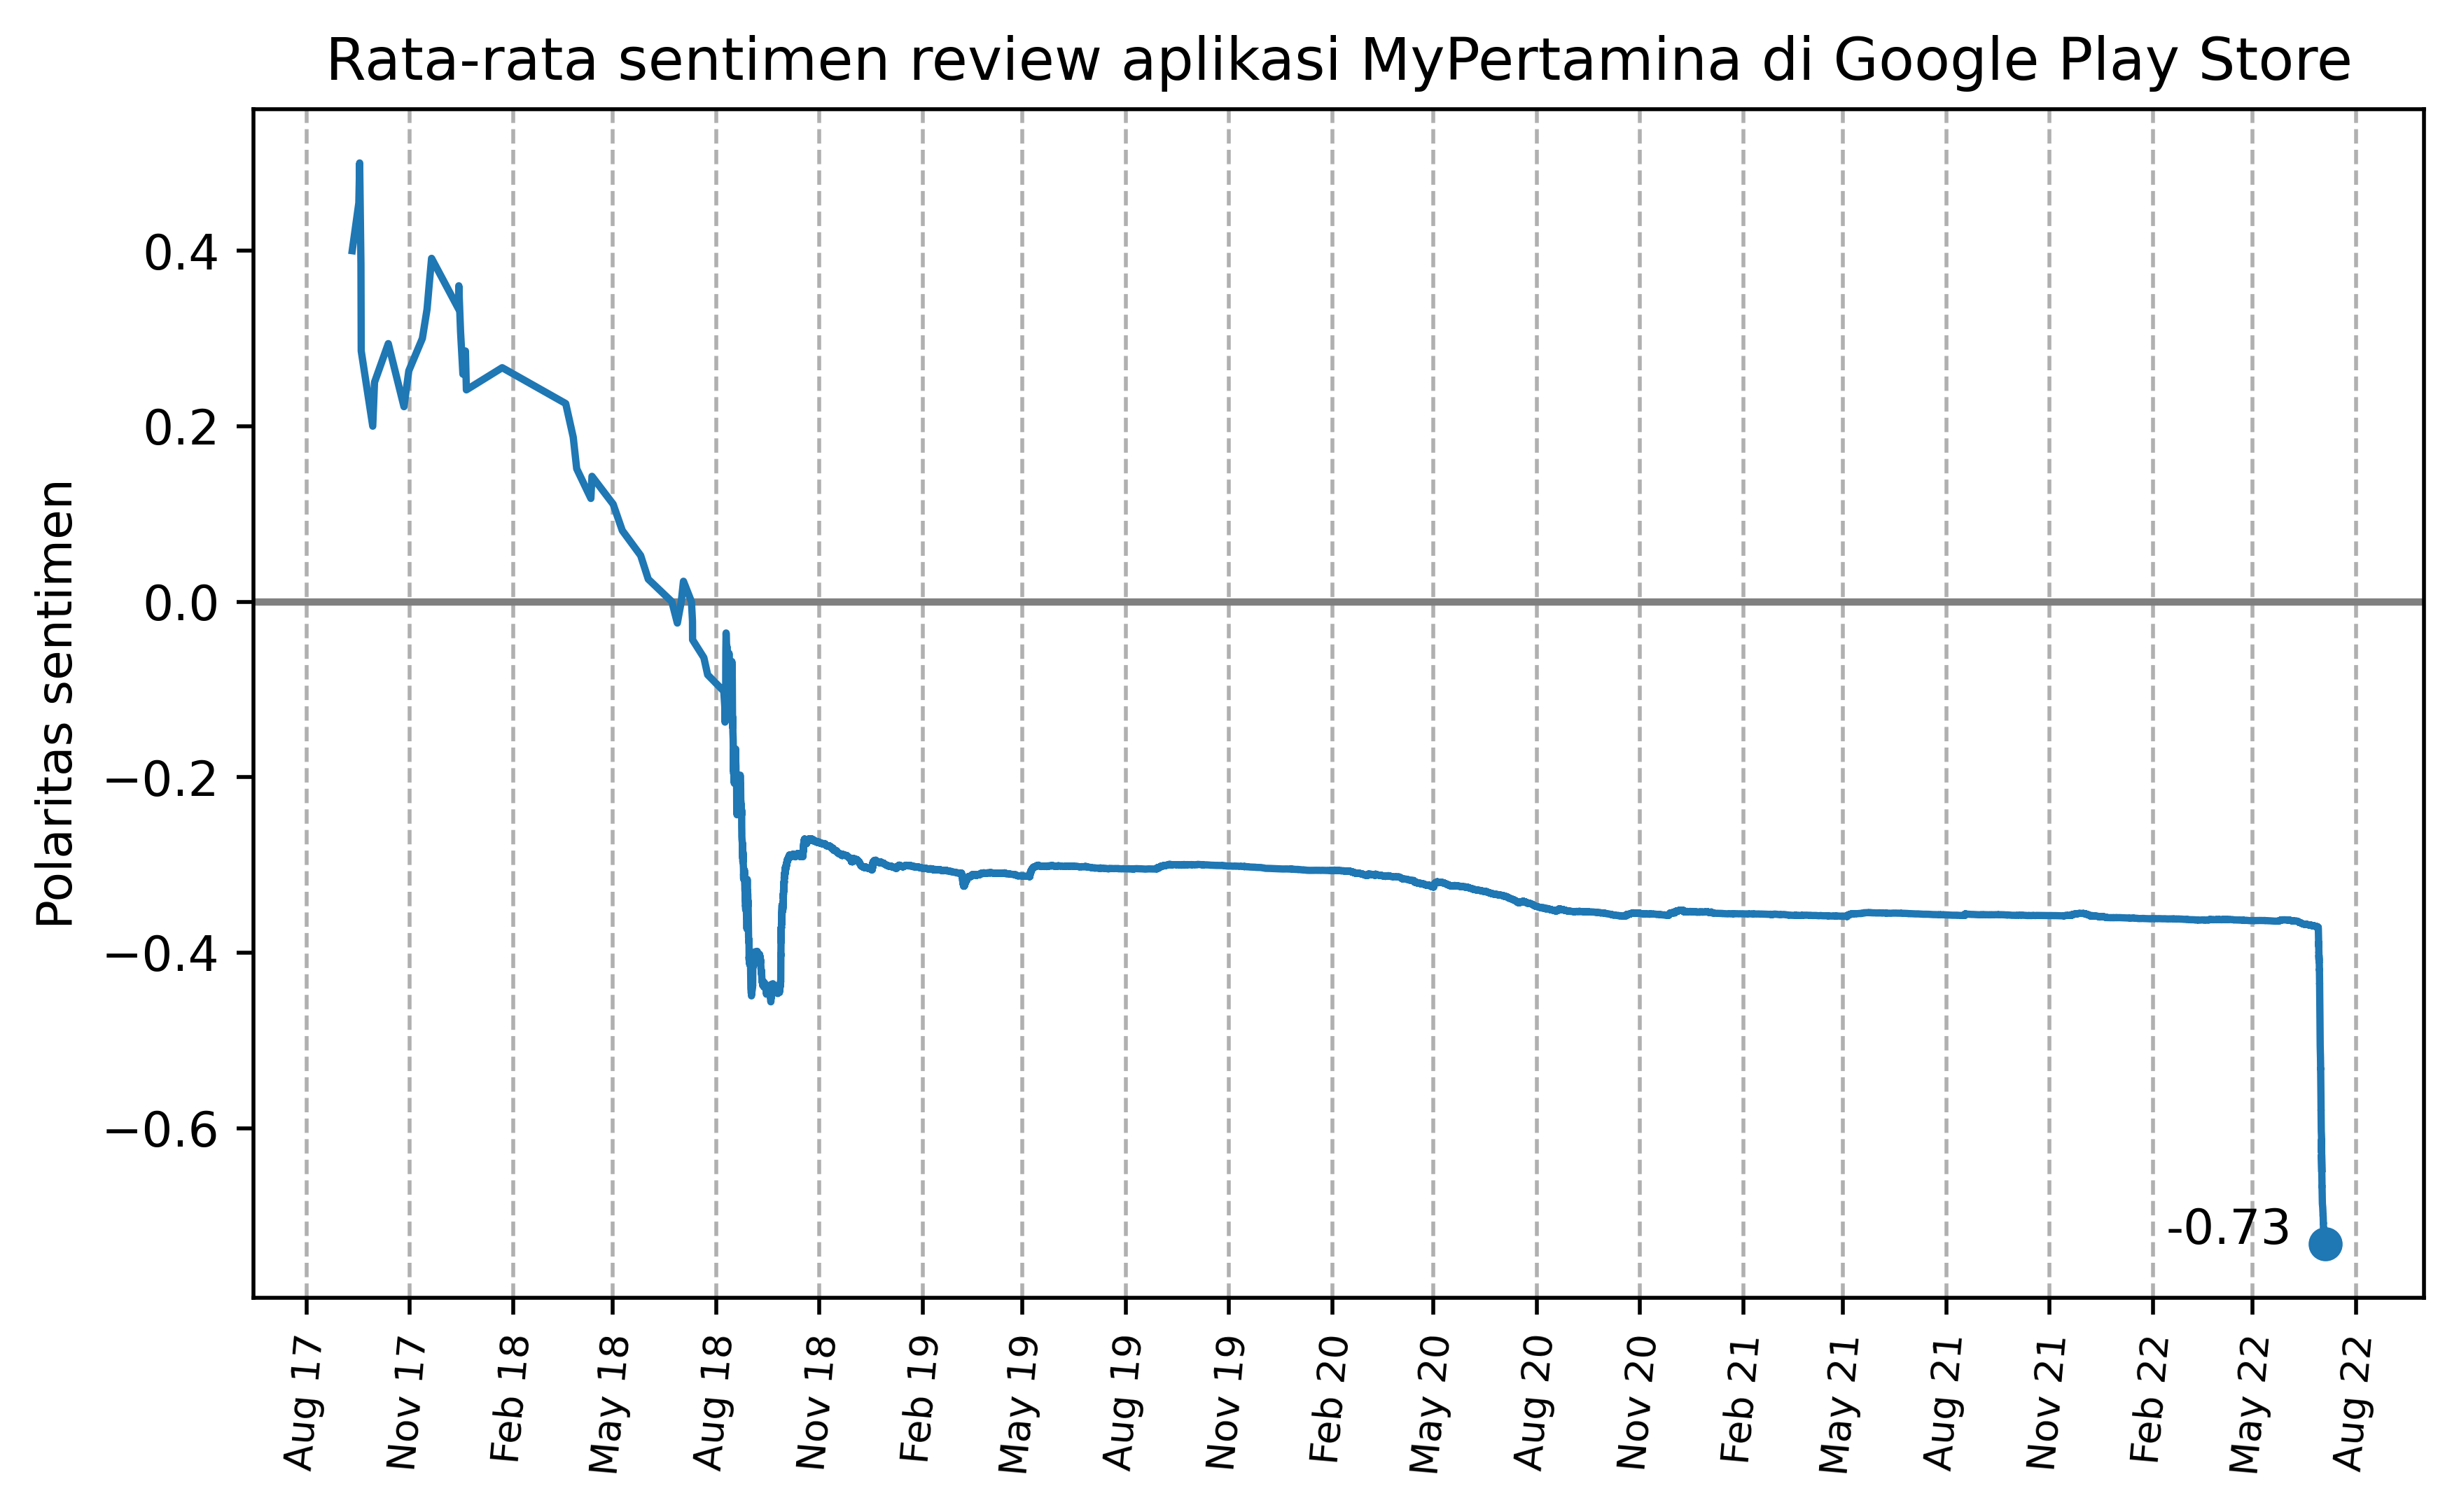

In [12]:
f, ax = plt.subplots()
ax.axhline(0, color='grey')
ax.plot(polarity_over_time)
ax.set_ylabel('Polaritas sentimen')
ax.set_xlabel('')

ax.xaxis.grid(visible=True, linestyle='dashed')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)

ax.set_title('Rata-rata sentimen review aplikasi MyPertamina di Google Play Store')

ax.text(polarity_over_time.index[-1] - timedelta(days=30), polarity_over_time[-1], polarity_over_time[-1].round(2), ha='right')
ax.scatter(polarity_over_time.index[-1], polarity_over_time[-1])

plt.savefig('polarity-over-time.png')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

STOPWORDS = pd.read_csv('masdevid-stopwords.csv')['word'].tolist()

STOPWORDS.extend([
    'nya', 'yg', 'pake', 'aja', 'gk', 'gak', 'ga', 'my',
])


def get_word_counts(series, n_gram=1):
    CV = CountVectorizer(stop_words=STOPWORDS,
                         ngram_range=(n_gram, n_gram))

    bow = CV.fit_transform(series)
    word_counts = pd.Series(bow.sum(axis=0).A1,
                        index=CV.get_feature_names_out())

    word_counts = word_counts.sort_values(ascending=False)
    return word_counts

In [14]:
negative_reviews = sentiments_over_time[sentiments_over_time['label'] == 'negative']['preprocessed']
get_word_counts(negative_reviews, 2)

C:\Users\Rayhan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


bikin ribet           2785
menyusahkan rakyat    1471
beli bensin           1454
bikin susah           1342
isi bensin            1310
                      ... 
info pert                1
info pertaminatapi       1
info peryaminax          1
info pin                 1
zzz gabisa               1
Length: 266676, dtype: int64

C:\Users\Rayhan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
C:\Users\Rayhan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


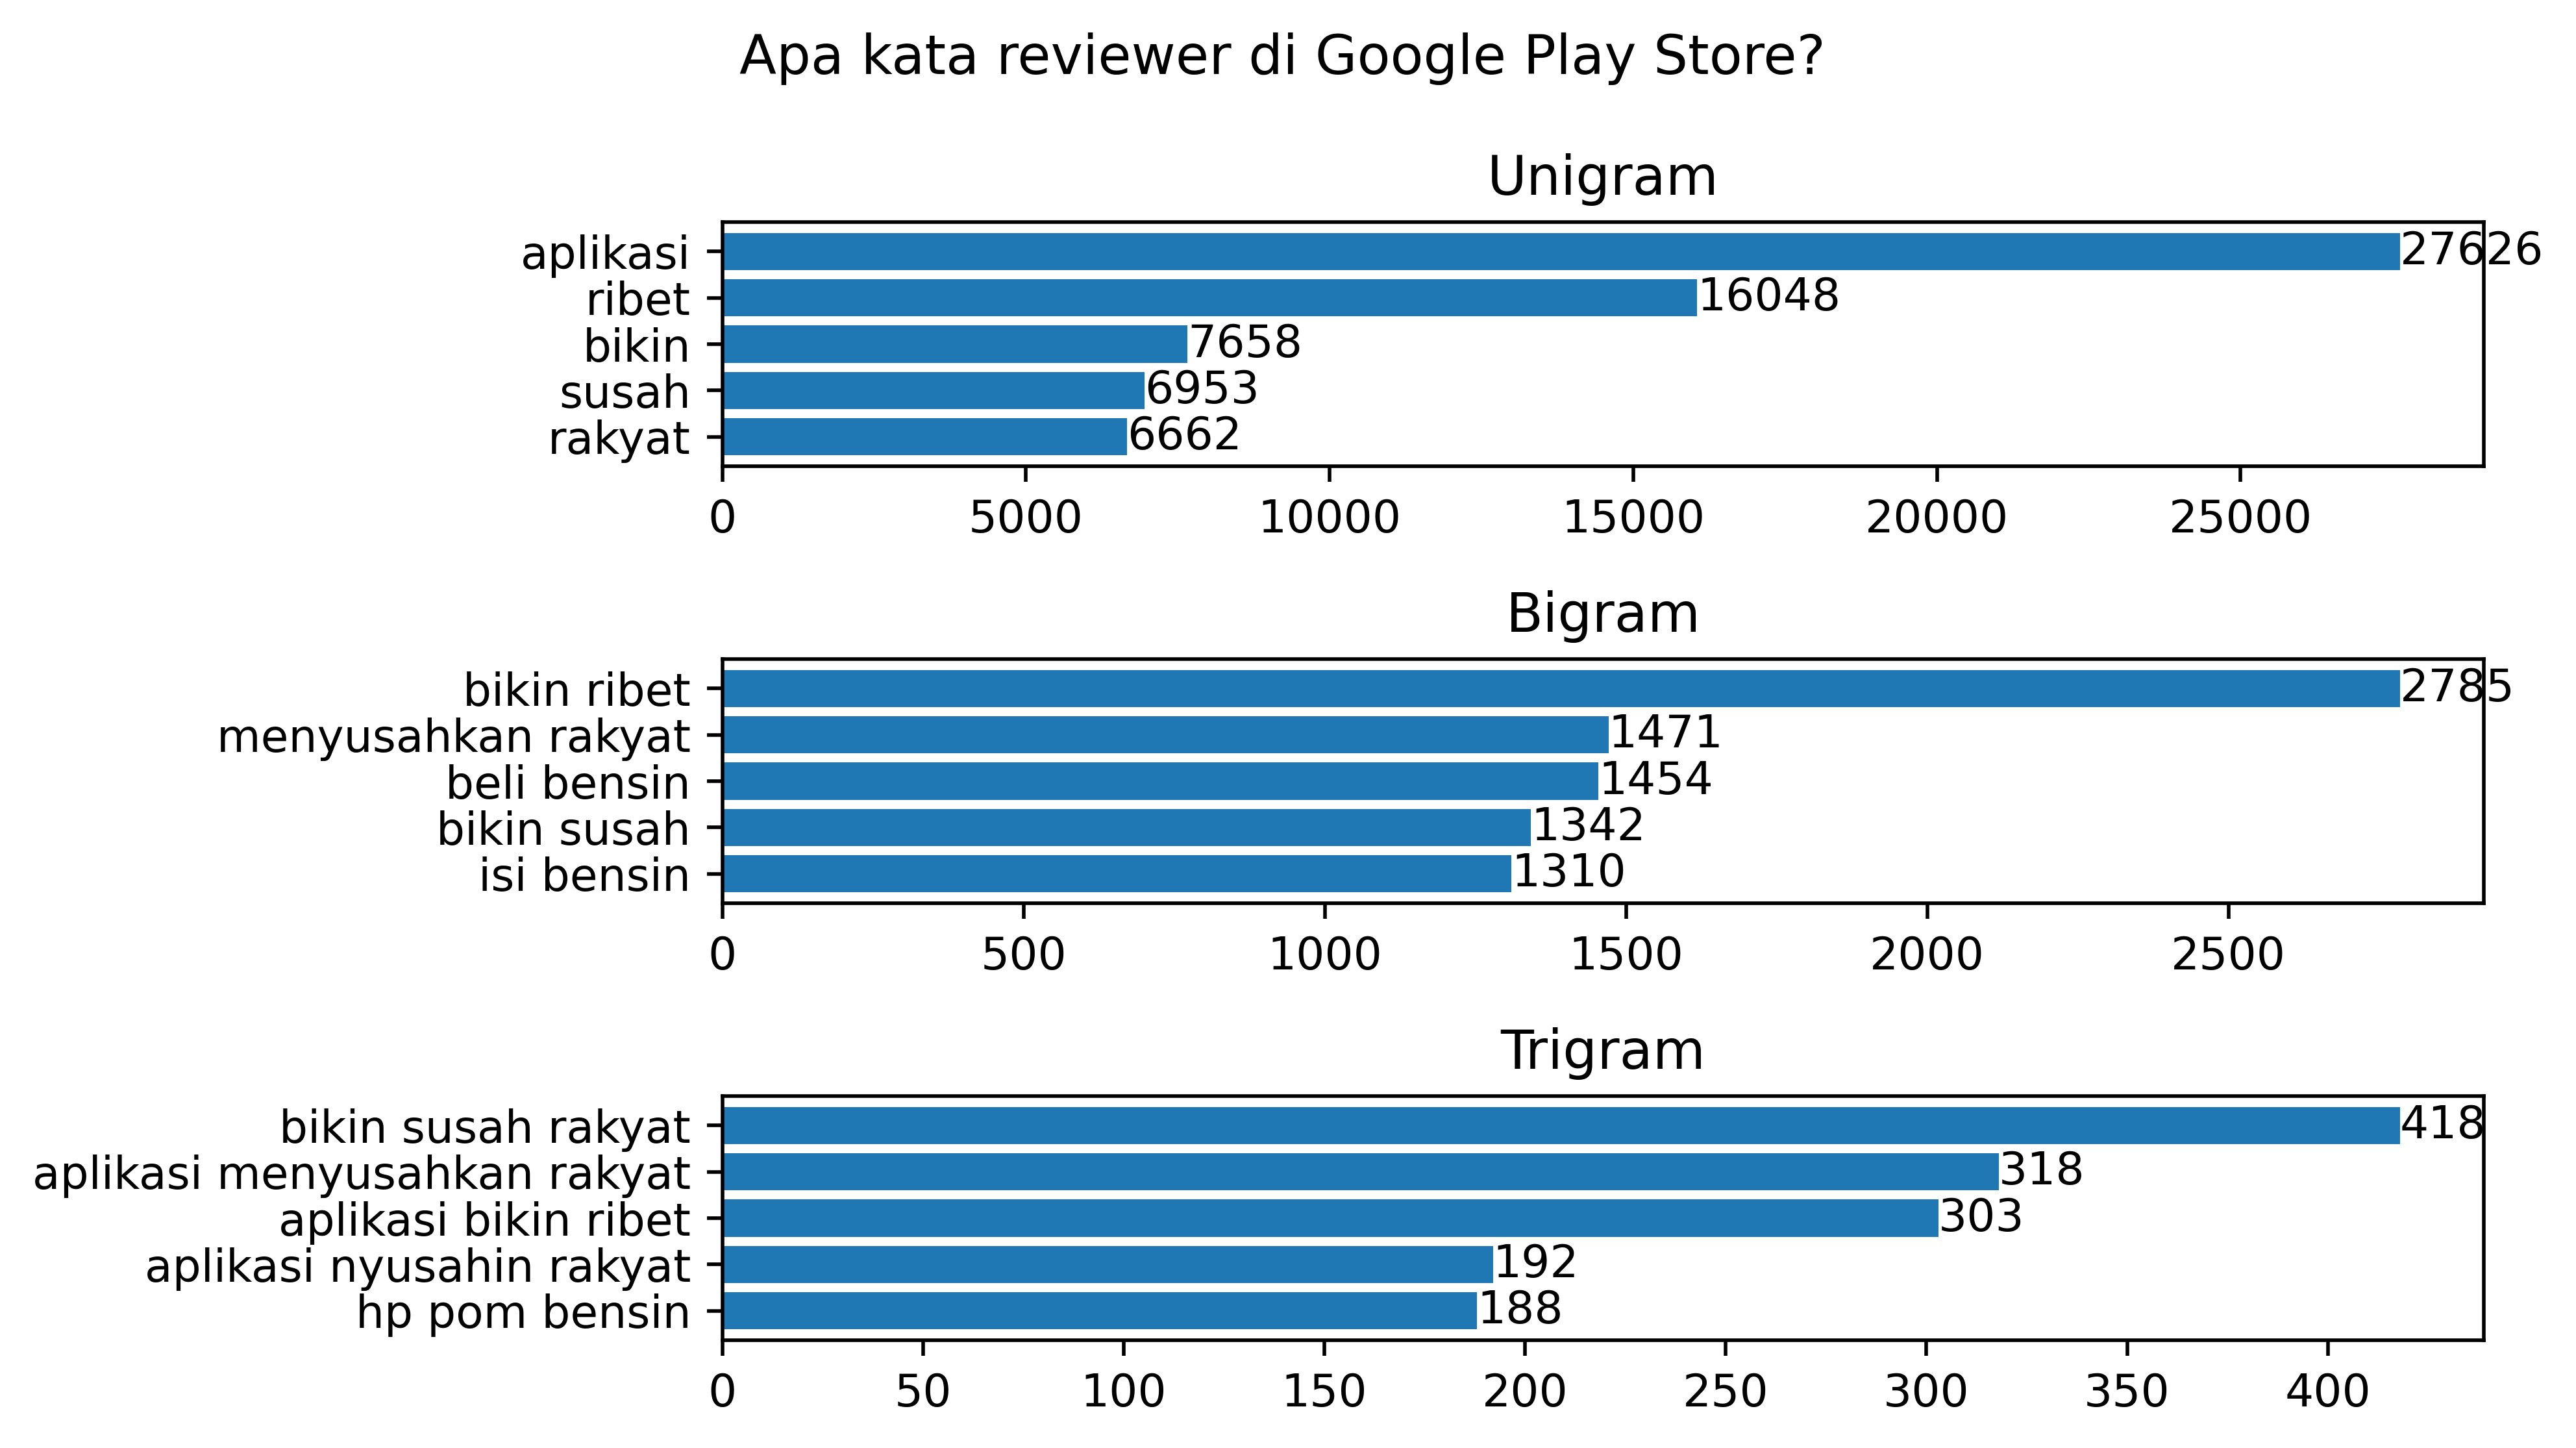

In [15]:
f, axes = plt.subplots(3, 1)

for idx in range(3):
    word_counts = get_word_counts(negative_reviews, idx+1)[:5]
    word_counts = word_counts[::-1]
    axes[idx].barh(word_counts.index, word_counts)
    axes[idx].bar_label(axes[idx].containers[0])

axes[0].set_title('Unigram')
axes[1].set_title('Bigram')
axes[2].set_title('Trigram')
f.suptitle('Apa kata reviewer di Google Play Store?')
f.tight_layout()

plt.savefig('most-common-words.png')
plt.show()